<a href="https://colab.research.google.com/github/DINESHGITAYE/Digit-Recognizer/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 6.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78937 sha256=b4a5b5f1f4fa6a63a2f228e363e49f54ff83dcf94f3e531da6ed70210ca00390
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=3802171bd11d0da5c9ed4711a34d0bf19ca814142d41e51866ba67e1b28e0587
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


# Import Libraries:

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


# Dataset:

dataset labels:

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [6]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

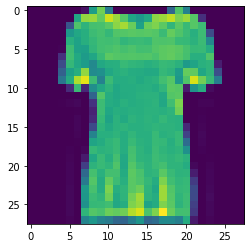

In [7]:
plt.imshow(X_train[10].reshape(28, 28))

<Figure size 432x288 with 0 Axes>

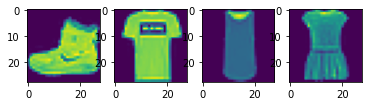

In [8]:
# Lets print multiple images.
plt.figure()

f, axis = plt.subplots(1,4) 

axis[0].imshow(X_train[0])
axis[1].imshow(X_train[1])
axis[2].imshow(X_train[2])
axis[3].imshow(X_train[3])

In [9]:
y_train[0:4]

array([9, 0, 0, 3], dtype=uint8)

# Data preparation:

In [10]:
# Reshape data:

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
# One hot encoding:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

# Model 1:

optimizer = "Adam" 

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = [28, 28, 1]))
model_1.add(Conv2D(filters=16, kernel_size=3, activation='relu'))

model_1.add(Flatten())
model.add(Dense(units = 10, activation='softmax'))

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_1.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4887 - accuracy: 0.8429 - val_loss: 0.3883 - val_accuracy: 0.8690
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3034 - accuracy: 0.8906 - val_loss: 0.3827 - val_accuracy: 0.8757
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2510 - accuracy: 0.9092 - val_loss: 0.3714 - val_accuracy: 0.8739
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2212 - accuracy: 0.9193 - val_loss: 0.4252 - val_accuracy: 0.8718
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1944 - accuracy: 0.9289 - val_loss: 0.4083 - val_accuracy: 0.8765
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1753 - accuracy: 0.9364 - val_loss: 0.4305 - val_accuracy: 0.8664
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1632 - accuracy: 0.9418 - val_loss: 0.5217 - val_accuracy:

# Model 2:
Optimizer: "rmsprop"

In [14]:
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = [28, 28, 1]))
model_2.add(Conv2D(filters=16, kernel_size=3, activation='relu'))

model_2.add(Flatten())
model_2.add(Dense(units = 10, activation='softmax'))

model_2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_2.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6696 - accuracy: 0.8257 - val_loss: 0.4952 - val_accuracy: 0.8340
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4370 - accuracy: 0.8540 - val_loss: 0.4996 - val_accuracy: 0.8291
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4250 - accuracy: 0.8593 - val_loss: 0.5571 - val_accuracy: 0.8333
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4194 - accuracy: 0.8600 - val_loss: 0.4839 - val_accuracy: 0.8353
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4123 - accuracy: 0.8628 - val_loss: 0.4448 - val_accuracy: 0.8483
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4116 - accuracy: 0.8610 - val_loss: 0.4538 - val_accuracy: 0.8463
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4122 - accuracy: 0.8602 - val_loss: 0.4633 - val_accuracy:

This model gives the less accuracy than previous model were we use 'Adam' optimizer.

So, Now we use adam optimizer in keras tunner

# Keras Tuner

## Model 1:
- *Model Configuration:*
1. Activation function in hidden layers = Relu
2. Activation function in output layer = Softmax
3. Initial epochs = 10
4. maximum trials = 10
5. final epochs = 20
6. validation split = 20% of training data (0.2)
7. Optimizer = Adam

In [ ]:
def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_1', min_value = 32, max_value = 100, step = 10),
                                kernel_size = hp.Choice('kernel_1', values = [3, 5]),
                                activation = 'relu',
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_2', min_value = 32, max_value = 64, step = 10),
                                kernel_size = hp.Choice('kernel_2', values = [3, 5]),
                                activation = 'relu'
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1', min_value = 32, max_value = 100, step = 10),
                                activation = 'relu'
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('lerning_rate', values = [1e-2, 1e-3])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner_1 = RandomSearch(build_model, objective='val_accuracy', max_trials = 10)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner_1.search(X_train, y_train, epochs = 10, validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_1.search(X_train, y_train, epochs = 10, validation_split = 0.2)
model_1 = tuner_1.get_best_models(num_models=1)[0]
model_1.summary()

INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 72)        1872      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 52)        33748     
_________________________________________________________________
flatten (Flatten)            (None, 25168)             0         
_________________________________________________________________
dense (Dense)                (None, 92)                2315548   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                930       
Total params: 2,352,098
Trainable params: 2,352,098
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(X_train, y_train, epochs = 20, validation_split=0.2, initial_epoch=10)

Epoch 11/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1086 - accuracy: 0.9614 - val_loss: 0.3197 - val_accuracy: 0.9172
Epoch 12/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0977 - accuracy: 0.9664 - val_loss: 0.3326 - val_accuracy: 0.9199
Epoch 13/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0834 - accuracy: 0.9713 - val_loss: 0.3970 - val_accuracy: 0.9161
Epoch 14/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0763 - accuracy: 0.9732 - val_loss: 0.4619 - val_accuracy: 0.9137
Epoch 15/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0678 - accuracy: 0.9774 - val_loss: 0.6280 - val_accuracy: 0.9091
Epoch 16/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 0.5561 - val_accuracy: 0.9139
Epoch 17/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0595 - accuracy: 0.9811 - val_loss: 0.5792 - val_ac

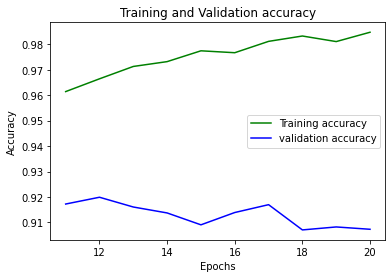

In [ ]:
train_acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
epochs = range(11, 21)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction:

In [ ]:
prediction = model_1.predict(X_test)
prediction

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [7.1908510e-14, 2.5012079e-17, 9.9997342e-01, ..., 4.8914554e-23,
        8.9430422e-23, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.9962623e-28, 2.7444739e-19, 5.0755136e-14, ..., 2.0461515e-04,
        1.6648963e-08, 4.2761257e-09]], dtype=float32)

In [ ]:
print(np.argmax(prediction[0]))

9


Our model predicts that the 1st element in dataset is *Ankle Boot* 

lets see the actual label of this element in y_test

In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Model 2:

- *Model Configuration*:
1. Activation function in hidden layers = Leaky Relu
2. Activation function in output layer = Softmax
3. Initial epochs = 10
4. maximum trials = 10
5. final epochs = 30
6. validation split = 20% of training data (i.e 0.2)
7. optimizer = Adam



In [ ]:
lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)

In [ ]:
import keras

def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_1', min_value = 32, max_value = 100, step = 10),
                                kernel_size = hp.Choice('kernel_1', values = [3, 5]),
                                activation = lrelu,
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_2', min_value = 32, max_value = 64, step = 10),
                                kernel_size = hp.Choice('kernel_2', values = [3, 5]),
                                activation = lrelu
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1', min_value = 32, max_value = 100, step = 10),
                                activation = lrelu
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('lerning_rate', values = [1e-2, 1e-3])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner_2 = RandomSearch(build_model, objective='val_accuracy', max_trials = 10)

tuner_2.search(X_train, y_train, epochs = 10, validation_split = 0.1)

best_model_2 = tuner_2.get_best_models(num_models=1)[0]

best_model_2.summary()

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 72)        1872      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 52)        33748     
_________________________________________________________________
flatten (Flatten)            (None, 25168)             0         
_________________________________________________________________
dense (Dense)                (None, 92)                2315548   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                930       
Total params: 2,352,098
Trainable params: 2,352,098
Non-traina

In [ ]:
history_2 = best_model_2.fit(X_train, y_train, epochs = 30, validation_split=0.2, initial_epoch=10)

Epoch 11/30
1500/1500 [==============================] - 7s 5ms/step - loss: 38.9743 - accuracy: 0.8183 - val_loss: 3.6253 - val_accuracy: 0.8388
Epoch 12/30
1500/1500 [==============================] - 7s 5ms/step - loss: 4.3108 - accuracy: 0.8521 - val_loss: 2.1426 - val_accuracy: 0.8723
Epoch 13/30
1500/1500 [==============================] - 7s 5ms/step - loss: 1.9023 - accuracy: 0.8693 - val_loss: 3.4014 - val_accuracy: 0.8305
Epoch 14/30
1500/1500 [==============================] - 7s 5ms/step - loss: 1.3183 - accuracy: 0.8757 - val_loss: 1.4674 - val_accuracy: 0.8700
Epoch 15/30
1500/1500 [==============================] - 7s 5ms/step - loss: 2.6876 - accuracy: 0.8679 - val_loss: 1.0774 - val_accuracy: 0.8719
Epoch 16/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5421 - accuracy: 0.9031 - val_loss: 1.1886 - val_accuracy: 0.8334
Epoch 17/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5814 - accuracy: 0.8984 - val_loss: 0.7173 - val_a

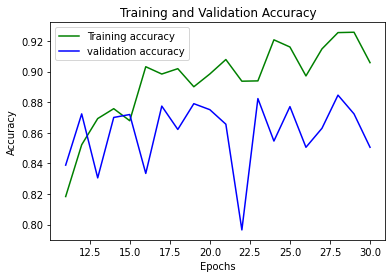

In [ ]:
train_acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
epochs = range(11, 31)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction:

In [ ]:
prediction_lrelu = best_model_2.predict(X_test)
print(np.argmax(prediction_lrelu[0]))
print(y_test[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Model 3:
- *Model Configration*:
1. Activation function in hidden layers = Elu
2. Activation function in output layer = Softmax
3. Initial epochs = 10
4. maximum trials = 10
5. final epochs = 30
6. validation split = 20% of training data (i.e 0.2)
7. optimizer = Adam

In [ ]:
from keras.activations import elu

ELU = lambda x: elu(x, alpha=0.4)

In [ ]:
import keras

def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_1', min_value = 32, max_value = 100, step = 10),
                                kernel_size = hp.Choice('kernel_1', values = [3, 5]),
                                activation = ELU,
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_2', min_value = 32, max_value = 64, step = 10),
                                kernel_size = hp.Choice('kernel_2', values = [3, 5]),
                                activation = ELU
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1', min_value = 32, max_value = 100, step = 10),
                                activation = ELU
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('lerning_rate', values = [1e-2, 1e-3])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner_3 = RandomSearch(build_model, objective='val_accuracy', max_trials = 10)

tuner_3.search(X_train, y_train, epochs = 10, validation_split = 0.1)

best_model_3 = tuner_3.get_best_models(num_models=1)[0]

best_model_3.summary()

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 72)        1872      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 52)        33748     
_________________________________________________________________
flatten (Flatten)            (None, 25168)             0         
_________________________________________________________________
dense (Dense)                (None, 92)                2315548   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                930       
Total params: 2,352,098
Trainable params: 2,352,098
Non-traina

In [ ]:
history_3 = best_model_3.fit(X_train, y_train, epochs = 30, validation_split = 0.2, initial_epoch=10)

Epoch 11/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1561 - accuracy: 0.9491 - val_loss: 0.5487 - val_accuracy: 0.8962
Epoch 12/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1704 - accuracy: 0.9426 - val_loss: 0.5592 - val_accuracy: 0.8954
Epoch 13/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1258 - accuracy: 0.9566 - val_loss: 0.7110 - val_accuracy: 0.8909
Epoch 14/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1224 - accuracy: 0.9596 - val_loss: 0.6771 - val_accuracy: 0.8882
Epoch 15/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1570 - accuracy: 0.9485 - val_loss: 0.6565 - val_accuracy: 0.8916
Epoch 16/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1341 - accuracy: 0.9572 - val_loss: 0.8393 - val_accuracy: 0.8952
Epoch 17/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2119 - accuracy: 0.9380 - val_loss: 0.5828 - val_ac

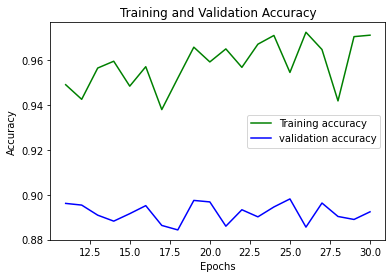

In [ ]:
train_acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
epochs = range(11, 31)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction:

In [ ]:
prediction_Prelu = best_model_3.predict(X_test)
print(np.argmax(prediction_Prelu[0]))
print(y_test[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
